#### Purpose of this notebook is to highlight preprocessing steps that took place for the entire data source (i.e., things that have to occur many times or need to occur before working with the data)

- Example - Handling new lines following "-" at the end of a sentence (e.g., "reinf-\ncement")
- Example 2 - data preprocessing steps

The output of this notebook will be the primary data source for each project repository

In [1]:
# Packages and modules needed
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk 
nltk.data.path.append("../models/")
from nltk.util import ngrams  
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re 

In [11]:
# Functions
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace("-\n", "-")
    serie = serie.str.replace("\n", " ")
    return serie

def remove_newline(value):
    value = value.replace("-\n", "")
    value = value.replace("\n"," ")
    return value

def remove_apostrophe(serie):
    serie = serie.str.replace("\x0c", "'")
    serie = serie.str.replace("-\x0c", "'")
    return serie

def replace_split_words(text):
    text = re.sub(r"-[\r\n]+","", text)
    return text

def remove_punctuation(text):
    text = re.sub(r"[^a-zA-Z0-9]"," ",text)
    return text

def lower_case(text):
    return text.lower()

def remove_numbers_uppercase(text):
    text = re.sub(r"[^a-z]"," ",text)
    return text

def remove_whitespace(text):
    return " ".join(text.split())

def remove_stopwords(text):
    lst = ['eg','et','al', 'e.g.,','i.e.,']
    stop_words = stopwords.words('english')
    stop_words = stop_words + lst
    stop_words = set(stop_words)
    word_tokens = word_tokenize(text)
    text = [word for word in word_tokens if word not in stop_words]
    text = " ".join(text)
    return text

def remove_proper_noun(text):
    word_tokens = word_tokenize(text)
    tagged_sentence = pos_tag(word_tokens)
    text = [word for (word,tag) in tagged_sentence if tag not in set(['NNP','NNPS'])]
    text = " ".join(text)
    return text 

def main(text):
    text = remove_newline(text)
    text = replace_split_words(text)
    text = remove_stopwords(text)
    text = remove_proper_noun(text)
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_numbers_uppercase(text)
    text = remove_whitespace(text)
    return text 

In [3]:
# References data file
df = pd.read_csv('../data/01_raw/references_in_lst.csv')
df

,title,pmcid,REFERENCES
0,THE EFFECT OF FEEDBACK ON THE ACCURACY OF CHEC...,PMC2741080,"['Adamski A, Stahl A. Principles of design and..."
1,Derived Relational Responding: A Comparison of...,PMC2893616,"['Barnes D, Smeets P.M, Leader G. New procedu..."
2,"Acquisition of Mands, Tacts, and Intraverbals ...",PMC3139555,"['DeLeon I.G, Iwata B.A. Evaluation of a multi..."
3,EVALUATION OF STIMULUS CONTROL OVER A COMMUNIC...,PMC2884360,"['Athens E.S, Vollmer T.R, Sloman K.N, Pipkin ..."
4,INCREASING ACCURATE PREFERENCE ASSESSMENT IMPL...,PMC3405929,"['Ciccone F.J, Graff R.B, Ahearn W.H. Long-ter..."
...,...,...,...
817,The Power of Cooperation,PMC2995513,"[""Kolbert E. The island in the wind: A Danish ..."
818,Resurgence of Temporal Patterns of Responding,PMC3088073,"['Azrin N.H, Hutchinson R.R, Hake D.F. Extinct..."
819,Climate Change: Meeting the Challenge,PMC2995515,"['Agras W.S, Jacob R.G, Lebedeck M. The Califo..."
820,Behavioral Coaching,PMC3640883,"['Allison M. G., Ayllon T. Behavioral coaching..."


In [4]:
# Selected citations data file
df = pd.read_csv('../data/01_raw/selected_citations.csv')
df

,abstract,citation_info,pmc_id,pm_id,title,authors,selected_references
0,Two pigeons were exposed to a multiple schedul...,J Exp Anal Behav. 1974 Jul; 22(1): 197–206. d...,PMCID: PMC1333257,PMID: 16811777,"Induced attack during multiple fixed-ratio, va...","['Frank M. Webbe', 'Jo DeWeese', 'E. F. Malago...",['APPEL JB. Aversive aspects of a schedule of ...
1,Explicit cue-producing responses were employed...,J Exp Anal Behav. 1966 Jul; 9(4): 469–473. do...,PMCID: PMC1338248,PMID: 4960162,Attention and cue-producing behavior in the mo...,"[""M. R. D'Amato"", 'James Fazzaro']","['KELLEHER RT, RIDDLE WC, COOK L. Observing re..."
2,Full text is available as a scanned copy of th...,Behav Anal. 1993 Fall; 16(2): 225–227. doi: 1...,PMCID: PMC2733636,PMID: 22478151,Establishing operations and the discriminative...,"['Margaret A. McDevitt', 'Edmund Fantino']","['Auge RJ. Context, observing behavior, and co..."
3,The behavioral effects of haloperidol (0.04 to...,J Exp Anal Behav. 1991 Sep; 56(2): 239–260. d...,PMCID: PMC1323100,PMID: 1955815,Distinguishing between haloperidol's and decam...,"['S C Fowler', 'P D Skjoldager', 'R M Liao', '...","['Cutmore TR, Beninger RJ. Do neuroleptics imp..."
4,Full text is available as a scanned copy of th...,J Exp Anal Behav. 1961 Oct; 4(4): 333–334. do...,PMCID: PMC1404140,PMID: 14453766,An automatic feeder for laboratory dogs,"['Michael Kaplan', 'David G. Wulp', 'C. Edward...",NaN
...,...,...,...,...,...,...,...
6678,"In two experiments, pigeons were exposed to co...",J Exp Anal Behav. 1993 Mar; 59(2): 361–371. d...,PMCID: PMC1322048,PMID: 16812690,Choice and delay of reinforcement: Effects of ...,"['Takashi Omino', 'Masato Ito']",['Baum WM. On two types of deviation from the ...
6679,The three major types of augmentative communic...,Anal Verbal Behav. 1993; 11: 99–116. doi: 10....,PMCID: PMC2748559,PMID: 22477084,Selecting a response form for nonverbal person...,['Mark L. Sundberg'],"['Bondy AS, Frost LA. Mands across the water: ..."
6680,Full text is available as a scanned copy of th...,Behav Anal. 1978 Spring; 1(1): 3–15. doi: 10....,PMCID: PMC2741802,PMID: 22477951,The midwestern association of behavior analysi...,['Margaret E. Peterson'],NaN
6681,NaN,J Appl Behav Anal. 2004 Spring; 37(1): 97–100....,PMCID: PMC1284484,PMID: 15154222,Extended diaper wearing: effects on continence...,"['Rachel S Tarbox', 'W Larry Williams', 'Patri...","['Azrin NH, Foxx RM. A rapid method of toilet ..."


In [5]:
# Main data source file
df = pd.read_csv('../data/01_raw/data_source.csv')
df

,article_title,authors,abstract,full_text,citation_info
0,Teaching Children With Autism Spectrum Disorde...,"Priya Patil,1 Tina M. Sidener,1 Heather Pane,1...",For most children with autism spectrum disorde...,The Analysis of Verbal Behavior (2021) 37:1–16...,Anal Verbal Behav. 2021 Jun; 37(1): 1–16.
1,Teaching Children with Autism to Mand for Info...,"Megan L. Pyles, Amanda N. Chastain, and Caio ...",The current study evaluated a procedure used t...,The Analysis of Verbal Behavior (2021) 37:17–3...,Anal Verbal Behav. 2021 Jun; 37(1): 17–34.
2,An Evaluation of the Emergence of Untrained Ac...,"Bryan J. Blair,1 Lesley A. Shawler,2 Leif K. A...",The online version contains supplementary mate...,The Analysis of Verbal Behavior (2021) 37:35–5...,Anal Verbal Behav. 2021 Jun; 37(1): 35–56.
3,The Effects of Competing Verbal Behavior on Pe...,"Michael J. Harman,1 Tiffany Kodak,2 Leah Bohl,...",The purposes of this study were to evaluate th...,The Analysis of Verbal Behavior (2021) 37:57–7...,Anal Verbal Behav. 2021 Jun; 37(1): 57–76.
4,Naming of Stimuli in Equivalence Class Formati...,Guro Granerud and Erik Arntzen,"In the present study, two typically developing...",The Analysis of Verbal Behavior (2021) 37:77–9...,Anal Verbal Behav. 2021 Jun; 37(1): 77–96.
...,...,...,...,...,...
9333,The midwestern association of behavior analysi...,Margaret E. Peterson,NaN,The Midwestern Association Of Behavior Analysi...,Behav Anal. 1978 Spring; 1(1): 3–15.
9334,A behavioral approach to the teaching of compo...,Julie S. Vargas,NaN,A Behavioral Approach\n\nto the Teaching of Co...,Behav Anal. 1978 Spring; 1(1): 16–24.
9335,Theory and technology in behavior analysis 1,Steven C. Hayes,The differences within behaviorism in general ...,Theory and Technology in Behavior Analysis'\n\...,Behav Anal. 1978 Spring; 1(1): 25–33.
9336,Engineering environments for behavioral opport...,Hal Markowitz,NaN,Engineering Environments\n\nfor Behavioral Opp...,Behav Anal. 1978 Spring; 1(1): 34–47.


In [12]:
# Remove new lines from each full_text
df['processed'] = remove_newlines(df['full_text'])
df['processed'][0]

/var/folders/c5/vpx80swj4yb9ytlnrk8w2qnr0000gn/T/ipykernel_78741/108516208.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


'The Analysis of Verbal Behavior (2021) 37:1–16 https://doi.org/10.1007/s40616-020-00138-x R E S E A R C H A R T I C L E Teaching Children With Autism Spectrum Disorder to Mand “Why?” Priya Patil 1 & Tina M. Sidener 1 Anjalee Nirgudkar 2 & Heather Pane 1 & Sharon A. Reeve 1 & Accepted: 18 September 2020/ # Association for Behavior Analysis International 2021 Published online: 14 January 2021 Abstract For most children with autism spectrum disorder (ASD), manding for information is an important skill that must be systematically taught. Although previous studies have evaluated interventions for teaching other mands for information, to date no studies have demonstrated effective procedures for teaching the mand “why?” The purpose of the present study was to teach 3 children with ASD to mand “why?” under relevant establishing operation conditions in 3 distinct scenarios. A trial-unique multiple-exem- plar procedure was used to promote generalization and increase the value of informa- tion 

In [13]:
# Remove funky apostophe characters (i.e., \x0c2)
df['processed'] = remove_apostrophe(df['processed'])
df['processed'][0]

"The Analysis of Verbal Behavior (2021) 37:1–16 https://doi.org/10.1007/s40616-020-00138-x R E S E A R C H A R T I C L E Teaching Children With Autism Spectrum Disorder to Mand “Why?” Priya Patil 1 & Tina M. Sidener 1 Anjalee Nirgudkar 2 & Heather Pane 1 & Sharon A. Reeve 1 & Accepted: 18 September 2020/ # Association for Behavior Analysis International 2021 Published online: 14 January 2021 Abstract For most children with autism spectrum disorder (ASD), manding for information is an important skill that must be systematically taught. Although previous studies have evaluated interventions for teaching other mands for information, to date no studies have demonstrated effective procedures for teaching the mand “why?” The purpose of the present study was to teach 3 children with ASD to mand “why?” under relevant establishing operation conditions in 3 distinct scenarios. A trial-unique multiple-exem- plar procedure was used to promote generalization and increase the value of informa- tion 

In [8]:
# Separate full text into paragraphs
df['paragraph'] = df['full_text'].apply(lambda x:  x if type(x)==float else x.split("\n\n"))
df.sample(5)

,article_title,authors,abstract,full_text,citation_info,processed,paragraph
2197,The reductive effects of noncontingent reinfor...,"J E Carr, K K Kellum, and I M Chong",The effects of fixed-time (FT) and variable-ti...,NaN,J Appl Behav Anal. 2001 Winter; 34(4): 505–509.,NaN,NaN
8975,A contextual approach to research on AIDS prev...,Edelgard Wulfert and Anthony Biglan,The acquired immune deficiency syndrome (AIDS)...,"The Behavior Analyst\n\n1994, 17, 353-363\n\nN...",Behav Anal. 1994 Fall; 17(2): 353–363.,"The Behavior Analyst 1994, 17, 353-363 No. 2 (...","[The Behavior Analyst, 1994, 17, 353-363, No. ..."
4195,Effects of Acute and Chronic Cocaine Administr...,Brian D Kangas and Marc N Branch,The effects of cocaine were examined under a t...,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,J Exp Anal Behav. 2012 Mar; 97(2): 151–161.,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,[JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAV...
8928,Looking for a way to improve your behavior ana...,Patricia M. Barbetta and Cindy L. Skaruppa,NaN,"The Behavior Analyst\n\n1995, 18, 155-160\n\nN...",Behav Anal. 1995 Spring; 18(1): 155–160.,"The Behavior Analyst 1995, 18, 155-160 No. 1 (...","[The Behavior Analyst, 1995, 18, 155-160, No. ..."
5191,Effects of reinforcement history on responding...,"S L Cohen, J Pedersen, G G Kinney, and J Myers",The effects of experimental history on respond...,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,J Exp Anal Behav. 1994 May; 61(3): 375–387.,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,[JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAV...


In [18]:
df.to_csv("../data/02_intermediate/newlines_apos_removed_paragraphs_added.csv", index=False)

In [14]:
data = []
for i in range(len(df)):
    article_indx = i 
    title = df['article_title'][i]
    for j in df['paragraph'][i]:
        data.append({'article_indx':article_indx,
                     'title':title,
                     "paragraph":j
                     })

['The Analysis of Verbal Behavior (2021) 37:1–16\nhttps://doi.org/10.1007/s40616-020-00138-x',
 'R E S E A R C H A R T I C L E',
 'Teaching Children With Autism Spectrum Disorder\nto Mand “Why?”',
 'Priya Patil 1 & Tina M. Sidener 1\nAnjalee Nirgudkar 2',
 '& Heather Pane 1 & Sharon A. Reeve 1 &',
 'Accepted: 18 September 2020/\n# Association for Behavior Analysis International 2021',
 'Published online: 14 January 2021',
 'Abstract\nFor most children with autism spectrum disorder (ASD), manding for information is an\nimportant skill that must be systematically taught. Although previous studies have\nevaluated interventions for teaching other mands for information, to date no studies\nhave demonstrated effective procedures for teaching the mand “why?” The purpose of\nthe present study was to teach 3 children with ASD to mand “why?” under relevant\nestablishing operation conditions in 3 distinct scenarios. A trial-unique multiple-exem-\nplar procedure was used to promote generalization 

In [8]:
# What are you trying to do here?
df['full_text'] = df['full_text'].apply(lambda x:  x if type(x)==float else remove_newlines(x))

AttributeError: 'str' object has no attribute 'str'

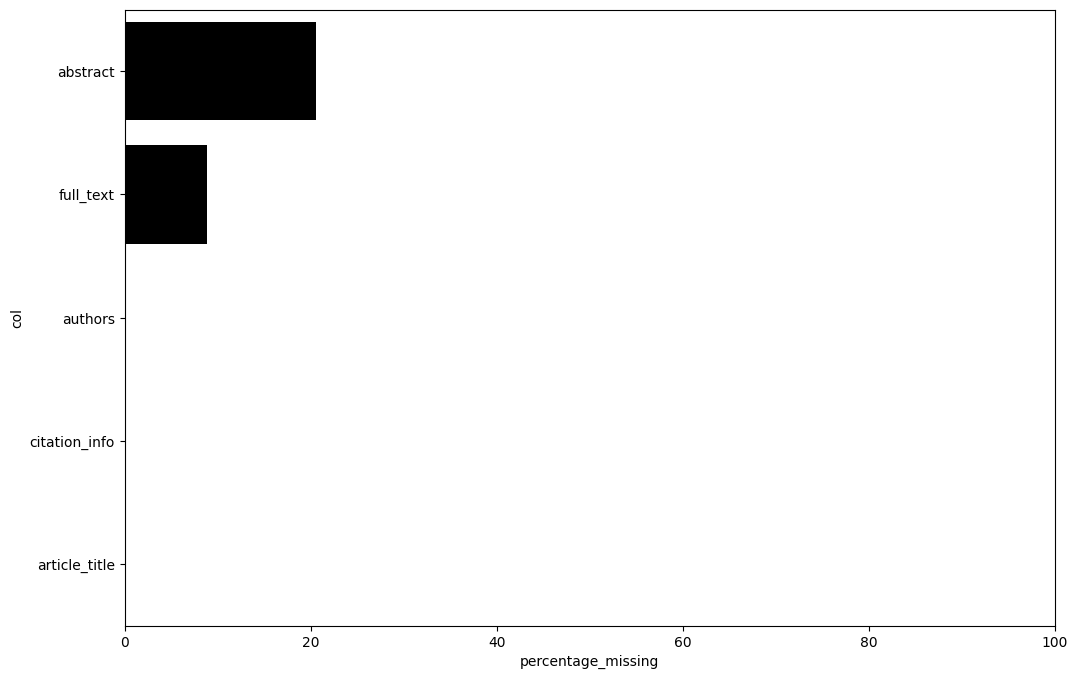

In [2]:

df = pd.read_csv('../data/01_raw/data_source.csv')
df.head(5)

missing = {}
for i in list(df):
    missing[i] = (df[i].isna().sum()/len(df))*100

msng_data = pd.DataFrame([missing]).T.reset_index(drop=False).rename(columns={"index":'col',
                                                                              0:'percentage_missing'}).sort_values(by=['percentage_missing'],ascending=False)


fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=msng_data,y='col',x='percentage_missing',color='black',ax=ax)
ax.set_xlim([0,100])
plt.show()

In [33]:
df['full_text'] = df['full_text'].apply(lambda x:  x if type(x)==float else main(x))


In [4]:
df['full_text'][0]

'The Analysis of Verbal Behavior (2021) 37:1–16\nhttps://doi.org/10.1007/s40616-020-00138-x\n\nR E S E A R C H A R T I C L E\n\nTeaching Children With Autism Spectrum Disorder\nto Mand “Why?”\n\nPriya Patil 1 & Tina M. Sidener 1\nAnjalee Nirgudkar 2\n\n& Heather Pane 1 & Sharon A. Reeve 1 &\n\nAccepted: 18 September 2020/\n# Association for Behavior Analysis International 2021\n\nPublished online: 14 January 2021\n\nAbstract\nFor most children with autism spectrum disorder (ASD), manding for information is an\nimportant skill that must be systematically taught. Although previous studies have\nevaluated interventions for teaching other mands for information, to date no studies\nhave demonstrated effective procedures for teaching the mand “why?” The purpose of\nthe present study was to teach 3 children with ASD to mand “why?” under relevant\nestablishing operation conditions in 3 distinct scenarios. A trial-unique multiple-exem-\nplar procedure was used to promote generalization and incr

In [3]:
df['abstract'][0]

'For most children with autism spectrum disorder (ASD), manding for information is an important skill that must be systematically taught. Although previous studies have evaluated interventions for teaching other mands for information, to date no studies have demonstrated effective procedures for teaching the mand “why?” The purpose of the present study was to teach 3 children with ASD to mand “why?” under relevant establishing operation conditions in 3 distinct scenarios. A trial-unique multiple-exemplar procedure was used to promote generalization and increase the value of information provided across trials. All 3 participants learned to mand “why?” in all 3 scenarios within a mean of 18 sessions (range 14–21 sessions), demonstrated generalization to novel stimuli and settings, and maintained this skill over time. Social validity for the intervention had an overall mean of 5.88 (range 1–7).'

In [39]:
exp = "10.\\d{4,9}/[-._;()/:a-z0-9A-Z]+"
pattern = re.compile(exp)
 
print( pattern.findall(df['full_text'][0]) )

['10.1007/s40616-020-00138-x', '10.1016/j.', '10.1177/0145445518822499', '10.1901/jaba.2011.44-943', '10.1007/s10803-009-0896-z', '10.1002/jaba.', '10.1901/jaba.2010.43-381', '10.1017/S0305000903005695', '10.1002/jaba.101', '10.1007/BF03393100', '10.1007/BF03393100', '10.1007/s40616-014-0007-x', '10.1901/jaba.2000.33-627', '10.1901/jeab.2006.67-01']


In [60]:
lst = []
for i in range(len(df)):
    val = df['abstract'][i]
    if type(val) == float:
        lst.append(np.nan)
    else:
        val = val.split('.')
        val = [i.strip() for i in val]
        embeddings = model.encode(val)

        lst.append(embeddings)

df['sent_embeddings'] = lst 

In [63]:
df['sent_embeddings']

0       [[-0.0003169663, 0.005141244, -0.06537939, 0.0...
1       [[0.019755458, 0.07035411, 0.0033892973, 0.055...
2       [[-0.10996719, -0.010216904, -0.0044781505, -0...
3       [[0.031987626, -0.031076448, 0.0066450993, -0....
4       [[-0.02598896, -0.0321146, -0.02877936, -0.035...
                              ...                        
9333                                                  NaN
9334                                                  NaN
9335    [[0.021915302, 0.011393616, -0.033672635, -0.0...
9336                                                  NaN
9337                                                  NaN
Name: sent_embeddings, Length: 9338, dtype: object

In [68]:
from sentence_transformers import SentenceTransformer, util
import torch
embedder = SentenceTransformer('all-MiniLM-L6-v2')

corpus = df['abstract'].dropna().tolist()
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)


In [101]:
queries = ['Generalized Matching Law']


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.dot_score(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], "(Score: {:.4f})".format(score))

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """





Query: Generalized Matching Law

Top 5 most similar sentences in corpus:
Allen (1981) claims to have established the formal validity of a power-function generalization of the matching law. This paper argues that Allen's proof is not correct when schedules are presented in pairs and that his initial assumptions are too restrictive when all schedules are simultaneously available. (Score: 0.6605)
The matching law may be viewed either as an empirical generalization, and therby subject to disproof, or as part of a system of equations used to define the utility (“value”) of a reinforcer. In the latter case it is tautologous, and not subject to disproof within the defining context. A failure to obtain matching will most often be a signal that the independent variables have not been properly scaled. If, however, the proper transformations have been made on the independent variables, and matching is not obtained, the experimental paradigm may be outside the purview of the matching law. At t

In [95]:
top_results

torch.return_types.topk(
values=tensor([0.6951, 0.6813, 0.6774, 0.6630, 0.6595]),
indices=tensor([4119, 3695, 1926, 3767, 1493]))

In [100]:
corpus[4119]

'A within-subject design, using human participants, compared delay discounting functions for real and hypothetical money rewards. Both real and hypothetical rewards were studied across a range that included $10 to $250. For 5 of the 6 participants, no systematic difference in discount rate was observed in response to real and hypothetical choices, suggesting that hypothetical rewards may often serve as a valid proxy for real rewards in delay discounting research. By measuring discounting at an unprecedented range of real rewards, this study has also systematically replicated the robust finding in human delay discounting research that discount rates decrease with increasing magnitude of reward. A hyperbolic decay model described the data better than an exponential model.'

In [47]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173980e-02 -4.28515561e-02 -1.56286508e-02  1.40537312e-02
  3.95538285e-02  1.21796280e-01  2.94333734e-02 -3.17523777e-02
  3.54959518e-02 -7.93140382e-02  1.75878499e-02 -4.04369496e-02
  4.97259647e-02  2.54912600e-02 -7.18700662e-02  8.14968124e-02
  1.47069187e-03  4.79627140e-02 -4.50335406e-02 -9.92174447e-02
 -2.81769410e-02  6.45045564e-02  4.44671251e-02 -4.76217046e-02
 -3.52952220e-02  4.38671559e-02 -5.28565943e-02  4.32974688e-04
  1.01921484e-01  1.64072495e-02  3.26997079e-02 -3.45986448e-02
  1.21339923e-02  7.94870779e-02  4.58342349e-03  1.57778580e-02
 -9.68202204e-03  2.87626311e-02 -5.05806915e-02 -1.55794229e-02
 -2.87907310e-02 -9.62286349e-03  3.15556489e-02  2.27349084e-02
  8.71449336e-02 -3.85027863e-02 -8.84718671e-02 -8.75497423e-03
 -2.12343559e-02  2.08923556e-02 -9.02078226e-02 -5.25732487e-02
 -1.05638858e-02  2.88310666e-02 -1.61455218e-02  6.17834646e-03
 -1.23234

In [105]:
df.loc[df['full_text'].astype('str').str.contains(""),:]

/var/folders/7w/tyjkqqd92rs3g8lyf6mr_b3h0000gn/T/ipykernel_83294/677436093.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['full_text'].astype('str').str.contains("(1981)"),:]


,article_title,authors,abstract,full_text,citation_info,abstract_sent,sent_embeddings
1,Teaching Children with Autism to Mand for Info...,"Megan L. Pyles, Amanda N. Chastain, and Caio ...",The current study evaluated a procedure used t...,The Analysis of Verbal Behavior (2021) 37:17–3...,Anal Verbal Behav. 2021 Jun; 37(1): 17–34.,[The current study evaluated a procedure used ...,"[[0.019755458, 0.07035411, 0.0033892973, 0.055..."
2,An Evaluation of the Emergence of Untrained Ac...,"Bryan J. Blair,1 Lesley A. Shawler,2 Leif K. A...",The online version contains supplementary mate...,The Analysis of Verbal Behavior (2021) 37:35–5...,Anal Verbal Behav. 2021 Jun; 37(1): 35–56.,[The online version contains supplementary mat...,"[[-0.10996719, -0.010216904, -0.0044781505, -0..."
6,Some Dimensions of Mand Variability and Implic...,Bryant C. Silbaugh,"Since Skinner’s conceptualization of the mand,...",The Analysis of Verbal Behavior (2021) 37:123–...,Anal Verbal Behav. 2021 Jun; 37(1): 123–145.,[Since Skinner’s conceptualization of the mand...,"[[-0.028756514, -0.03980985, 0.0018632667, 0.0..."
7,Standing on the Shoulders of a Giant: Remembra...,Mark L. Sundberg1 and Henry D. Schlinger2,"In 1959, Jack Michael and his PhD student Ted ...",The Analysis of Verbal Behavior (2021) 37:146–...,Anal Verbal Behav. 2021 Jun; 37(1): 146–151.,"[In 1959, Jack Michael and his PhD student Ted...","[[-0.0879954, -0.0064932466, -0.08643185, 0.10..."
11,The Consummate Skinnerian: Remembering Jack Mi...,Mark L. Sundberg,NaN,The Analysis of Verbal Behavior (2021) 37:163–...,Anal Verbal Behav. 2021 Jun; 37(1): 163–166.,NaN,NaN
...,...,...,...,...,...,...,...
9308,Charles B. Ferster 1922-1981,John J. Boren,NaN,"The Behavior Analyst\n\n1981, 4, 155-156\n\nNo...",Behav Anal. 1981 Fall; 4(2): 155–156.,NaN,NaN
9309,Concerning Michael's concerns,Richard W. Malott,NaN,"The Behavior Analyst\n\n1981, 4, 163-164\n\nNo...",Behav Anal. 1981 Fall; 4(2): 163–164.,NaN,NaN
9310,The spread of behavior analysis to social work,Richard A. Polster and Richard F. Dangel,NaN,"The Behavior Analyst\n\n1981, 4, 165-166\n\nNo...",Behav Anal. 1981 Fall; 4(2): 165–166.,NaN,NaN
9311,On behavioral analysis 1,H. S. Pennypacker,NaN,"The Behavior Analyst\n\n1981, 4, 159-161\n\nNo...",Behav Anal. 1981 Fall; 4(2): 159–161.,NaN,NaN


In [99]:
df['full_text']

0       The Analysis of Verbal Behavior (2021) 37:1–16...
1       The Analysis of Verbal Behavior (2021) 37:17–3...
2       The Analysis of Verbal Behavior (2021) 37:35–5...
3       The Analysis of Verbal Behavior (2021) 37:57–7...
4       The Analysis of Verbal Behavior (2021) 37:77–9...
                              ...                        
9333    The Midwestern Association Of Behavior Analysi...
9334    A Behavioral Approach\n\nto the Teaching of Co...
9335    Theory and Technology in Behavior Analysis'\n\...
9336    Engineering Environments\n\nfor Behavioral Opp...
9337    Instructional Technology and Educational Refor...
Name: full_text, Length: 9338, dtype: object